In [21]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-GB;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6768/44342/train_2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604690163&Signature=rUg%2BHIoscVZGK2XLDIV3rdfC5cjx12G2%2BamNM0gHdtna2epx9T2wIVLMMLunDM8a2%2FnbHpy9fO32Ts%2BrC%2Fso1GLVkF9WMMpaWLmmZpE8dfc9I3iQDiH6c4gMvYGSQ0wFrR0uTmVBTpi%2FSIuen%2FY%2Bxk8LRPjiWVEyYAqzfGP5nb4tQQf%2FfMJe9x3O3GpFFMUdD1G8ol01nMnOfx8EKBA7nyPLc59B7ywjn9l7THNIfjfBUWo0Dv8kK7MHIV2tXjFnUmD7R4vPZggLV0LxDj%2BWhVT9XaZUPxOa7JYR3CtgDCnW4o%2BwZMmx3q5%2FmlkSN%2BVw4iq92vNGQAAbts0e%2F1R0lw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_2.csv.zip" -c -O 'train_2.csv.zip'

--2020-11-03 19:16:19--  https://storage.googleapis.com/kagglesdsdata/competitions/6768/44342/train_2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604690163&Signature=rUg%2BHIoscVZGK2XLDIV3rdfC5cjx12G2%2BamNM0gHdtna2epx9T2wIVLMMLunDM8a2%2FnbHpy9fO32Ts%2BrC%2Fso1GLVkF9WMMpaWLmmZpE8dfc9I3iQDiH6c4gMvYGSQ0wFrR0uTmVBTpi%2FSIuen%2FY%2Bxk8LRPjiWVEyYAqzfGP5nb4tQQf%2FfMJe9x3O3GpFFMUdD1G8ol01nMnOfx8EKBA7nyPLc59B7ywjn9l7THNIfjfBUWo0Dv8kK7MHIV2tXjFnUmD7R4vPZggLV0LxDj%2BWhVT9XaZUPxOa7JYR3CtgDCnW4o%2BwZMmx3q5%2FmlkSN%2BVw4iq92vNGQAAbts0e%2F1R0lw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_2.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157467909 (150M) [application/zip]
Saving to: ‘train_2.csv.zip’

train_2.csv.zip    

In [23]:
!unzip "train_2.csv.zip"

Archive:  train_2.csv.zip
  inflating: train_2.csv             


In [24]:
from  tensorflow.keras.models import Model, load_model
from  tensorflow.keras.layers import Dense, Dropout, Flatten
from  tensorflow.keras.layers import Input,LSTM,Bidirectional,Embedding
from  tensorflow.keras.layers import Conv1D
from  tensorflow.keras.layers import Reshape
from  tensorflow.keras.layers import MaxPooling1D
from  tensorflow.keras.layers import AveragePooling1D
from  tensorflow.keras.layers import concatenate
from  tensorflow.keras.optimizers import Adam
from  tensorflow.keras.layers import RepeatVector
from  tensorflow.keras.layers import TimeDistributed 
from  tensorflow.keras import Sequential 
from tensorflow.keras.losses import Huber
from tensorflow.keras.utils import plot_model


In [27]:
train = pd.read_csv("/content/train_2.csv")


In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train_2.csv")
#key = pd.read_csv("key_2.csv")
key["date"] = key.Page.apply(lambda x:x[-10:])
key["Page"] = key.Page.apply(lambda x :x[:-11])
key["date"] = key["date"].astype('datetime64[ns]')

In [ ]:
!unzip /content/train_2.csv.zip

Archive:  /content/train_2.csv.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/train_2.csv.zip or
        /content/train_2.csv.zip.zip, and cannot find /content/train_2.csv.zip.ZIP, period.


## Smape

In [28]:
import tensorflow.keras.backend as K 
def k_smape(y_true,y_pred):
    diff = K.abs((y_true-y_pred)/K.clip(K.abs(y_true) + K.abs(y_pred),K.epsilon(),None))
    return 200.0*K.mean(diff,axis=-1)

In [29]:
def smape(y_true, y_pred, axis=None):
    '''Symmetric mean absolute percentage error'''
    diff = np.abs((y_true - y_pred) / 
                  np.clip(np.abs(y_true) + np.abs(y_pred), np.float32(1e-07), None))
    return np.float32(200.) * np.nanmean(diff, axis=axis)

In [30]:
## For deep learning Models we need the shape for (no. of pages,no. of days,1(features with one time series))
## Here I am using 100 days to train 64 days for test
## 

In [31]:
def reshape(df):
    return df.reshape((df.shape[0],df.shape[1],1))

In [32]:
def prepare_data(train,x_length,y_length,moving_window=32):
    
    #train_x_dates = train.iloc[:,-x_length-y_length:-y_length].columns
    #train_y_dates = train.iloc[:,-y_length:].columns
    train_x = reshape(train.iloc[:,-x_length-y_length-32:-y_length-32].values)
    train_y = reshape(train.iloc[:,-y_length-32:-32].values)
    
    val_x = reshape(train.iloc[:,-x_length-y_length:-y_length].values)
    val_y = reshape(train.iloc[:,-y_length:].values)
    
    
    
    test_x = reshape(train.iloc[:,-x_length:].values)
    
    
   
    return train_x,train_y,val_x,val_y,test_x    

## Applying log transform

In [33]:

def log(X):
    return np.log10(X + 1.0)
def unlog(X):
    return np.clip(np.power(10., X) - 1.0, 0.0, None)

In [34]:
data = train.fillna(0).iloc[:,1:]
data = log(data)

In [35]:
features = pd.DataFrame()
features[["topic","lang","access","type"]] = train["Page"].str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')
features = features.drop("topic",axis=1)

In [36]:
page_array = pd.get_dummies(features).values


In [37]:

x_length =100 # Taking last 100 days 
y_length = 64 # to predict the next 64 dyas 

In [38]:
train_x,train_y,val_x,val_y,test_x  = prepare_data(data,100,64)

### Numerical Features

In [39]:
from scipy import stats
stats_feats = pd.DataFrame()
stats_feats["mean"] = np.mean(data,axis=1)
stats_feats["median"] =np.median(data,axis=1)
stats_feats["std"] = np.std(data,axis=1)

stats_feats['percentile_25'] = np.quantile(data,axis=1,q=0.25)
stats_feats['percentile_50'] =  np.quantile(data,axis=1,q=0.50)
stats_feats['percentile_75'] =np.quantile(data,axis=1,q=0.75)
stats_feats['percentile_90'] = np.quantile(data,axis=1,q=0.90)

stats_feats["Kurt"] = stats.kurtosis(data,axis=1)
stats_feats["skewness"] = stats.skew(data,axis=1)

### LabelEncoding 

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
features.head()

,lang,access,type
0,zh,all-access,spider
1,zh,all-access,spider
2,zh,all-access,spider
3,zh,all-access,spider
4,zh,all-access,spider


## Creating Embedding for Categorical features


In [ ]:
###the additional features will be embedded with the Time series features 

In [43]:
features["lang"] = features["lang"].astype('category')
features["access"] = features["access"].astype('category')
features["type"] = features["type"].astype('category')


features["lang"] = features["lang"].cat.codes
features["access"] = features["access"].cat.codes
features["type"] = features["type"].cat.codes

lang_fe = le.fit_transform(features["lang"])
acc_fe = le.fit_transform(features["access"])
ty_fe = le.fit_transform(features["type"])

In [44]:
ins = []
concat = []

In [45]:
cat_vars = features.columns
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = features[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)

In [46]:
for cat in cat_vars:
    x = Input((1,), name=cat)
    ins.append(x)
    x = Embedding(cat_sizes[cat]+1, cat_embsizes[cat], input_length=1)(x)
    x = Reshape((cat_embsizes[cat],))(x)
    concat.append(x)

In [47]:
y = Input((9,), name='cont_vars')
ins.append(y)
concat.append(y)

In [ ]:
ins

[<tf.Tensor 'lang:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'access:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'type:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'cont_vars:0' shape=(None, 9) dtype=float32>]

In [48]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, Input, Reshape, Concatenate
from tensorflow.keras.models import Model


In [49]:
y = Concatenate()(concat)
y = Dense(128, activation= 'relu')(y)
y = Dense(96)(y)


## CNN 1D

In [50]:
layer_0 = Input(shape=(x_length,1), name='x_input')
layer_t = Conv1D(128, kernel_size=3, activation='tanh',name = "CNN1")(layer_0)
layer_t = Conv1D(64, kernel_size=3, activation='tanh',name = "CNN2")(layer_t)
layer_t = AveragePooling1D(pool_size=2,name="AVMAX1")(layer_t)
layer_cnn_x = Flatten()(layer_t)


layer_con = concatenate([layer_cnn_x, y])
layer_f = Dense(64)(layer_con)


model_cnn = Model(inputs=[layer_0,ins], outputs=layer_f)
model_cnn.compile(optimizer='adam',
              loss=Huber(), metrics=[k_smape])

In [51]:
model_cnn.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lang (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
access (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
type (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
x_input (InputLayer)            [(None, 100, 1)]     0                                            
_______________________________________________________________________________________

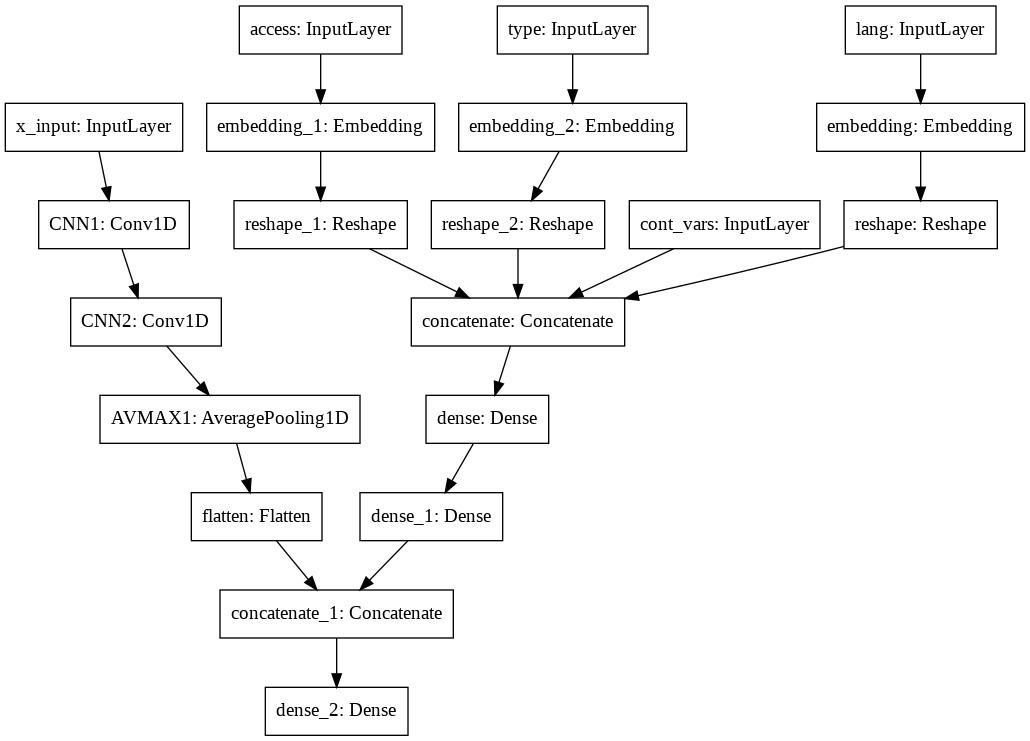

In [54]:
plot_model(model_cnn)

In [ ]:
history_cnn = model_cnn.fit({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":train_x,"cont_vars":input_num},y=train_y,
          validation_data=({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num},val_y),epochs=30,batch_size=1000)

Train on 145063 samples, validate on 145063 samples
Epoch 1/30
145063/145063 [==============================] - 4s 30us/sample - loss: 0.0648 - k_smape: 22.9947 - val_loss: 0.0360 - val_k_smape: 20.0686
Epoch 2/30
145063/145063 [==============================] - 3s 22us/sample - loss: 0.0292 - k_smape: 18.8324 - val_loss: 0.0352 - val_k_smape: 19.8293
Epoch 3/30
145063/145063 [==============================] - 3s 23us/sample - loss: 0.0280 - k_smape: 18.6167 - val_loss: 0.0363 - val_k_smape: 20.5223
Epoch 4/30
145063/145063 [==============================] - 3s 23us/sample - loss: 0.0273 - k_smape: 18.4923 - val_loss: 0.0336 - val_k_smape: 19.8963
Epoch 5/30
145063/145063 [==============================] - 3s 23us/sample - loss: 0.0269 - k_smape: 18.4257 - val_loss: 0.0343 - val_k_smape: 20.0156
Epoch 6/30
145063/145063 [==============================] - 3s 23us/sample - loss: 0.0269 - k_smape: 18.4414 - val_loss: 0.0331 - val_k_smape: 19.8669
Epoch 7/30
145063/145063 [================

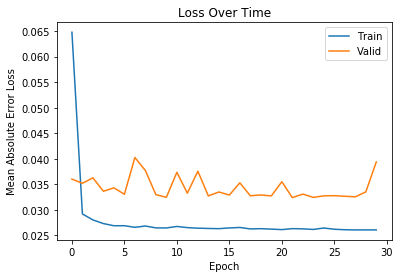

In [ ]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])
plt.show()

In [ ]:
cnn_val_pred =  model_cnn.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num})

In [ ]:
score = calc(unlog(val_y),unlog(cnn_val_pred))

100%|██████████| 145063/145063 [00:25<00:00, 5646.05it/s]


In [ ]:
print("SMAPE Validation CNN: ",score)

SMAPE Validation CNN:  50.52750902606337


In [ ]:
cnn_test = model_cnn.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":test_x,"cont_vars":input_num})
cnn_sub =make_pred(test_x,unlog(cnn_test))
cnn_sub.to_csv("CNN_sub.csv",header=True,index=False)

### LSTM 

In [55]:
layer_0 = Input(shape=(100,1), name='x_input')
layer_lstm = LSTM(128,activation="relu",return_sequences =True)(layer_0)
layer_lstm = LSTM(96,activation="relu",return_sequences =True)(layer_lstm)

layer_fl  = Flatten()(layer_lstm)


layer_conc = concatenate([layer_fl, y])
final_layer = Dense(64)(layer_conc)

model_lstm = Model(inputs=[layer_0,ins], outputs=final_layer)
model_lstm.compile(optimizer='adam',
              loss=Huber(), metrics=[k_smape])

In [56]:
model_lstm.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lang (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
access (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
type (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 5)         45          lang[0][0]                       
_______________________________________________________________________________________

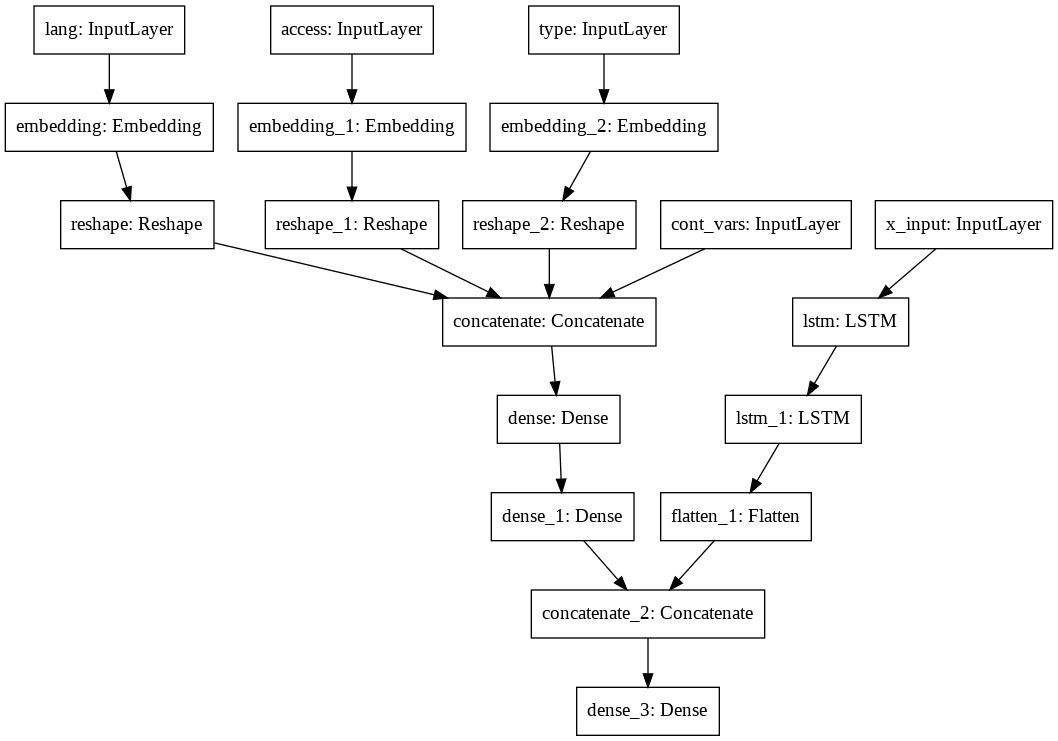

In [57]:
plot_model(model_lstm)

In [ ]:
hist_lstm = model_lstm.fit({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":train_x,"cont_vars":input_num},y=train_y,
          validation_data=({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num},val_y),epochs=30,batch_size=1000)

Train on 145063 samples, validate on 145063 samples
Epoch 1/30
145063/145063 [==============================] - 42s 291us/sample - loss: 0.0670 - k_smape: 23.0697 - val_loss: 0.0345 - val_k_smape: 19.6025
Epoch 2/30
145063/145063 [==============================] - 39s 267us/sample - loss: 0.0287 - k_smape: 18.7179 - val_loss: 0.0346 - val_k_smape: 19.7146
Epoch 3/30
145063/145063 [==============================] - 38s 264us/sample - loss: 0.0277 - k_smape: 18.5191 - val_loss: 0.0328 - val_k_smape: 19.5186
Epoch 4/30
145063/145063 [==============================] - 39s 266us/sample - loss: 0.0271 - k_smape: 18.4366 - val_loss: 0.0319 - val_k_smape: 19.4929
Epoch 5/30
145063/145063 [==============================] - 38s 265us/sample - loss: 0.0268 - k_smape: 18.3879 - val_loss: 0.0323 - val_k_smape: 19.2641
Epoch 6/30
145063/145063 [==============================] - 39s 266us/sample - loss: 0.0267 - k_smape: 18.3726 - val_loss: 0.0312 - val_k_smape: 19.1472
Epoch 7/30
145063/145063 [====

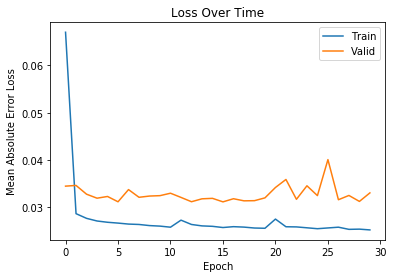

In [ ]:
plt.plot(hist_lstm.history['loss'])
plt.plot(hist_lstm.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])
plt.show()

In [ ]:
lstm_val_pred = model_lstm.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num})

In [ ]:
from tqdm import tqdm
def calc(y_true_arr,y_val_arr):
    score = []
    for i in tqdm(range(len(y_true_arr))):
        score.append(smape(y_true_arr[i],y_val_arr[i]))
    return np.mean(score)

In [ ]:

sc = calc(unlog(val_y),unlog(lstm_val_pred))

100%|██████████| 145063/145063 [00:25<00:00, 5584.44it/s]


In [ ]:
print("Validation Smape(LSTM) : ", sc)

Validation Smape(LSTM) :  45.24965046075464


In [ ]:

lstm_test = model_lstm.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":test_x,"cont_vars":input_num})
lstm_sub =make_pred(test_x,unlog(lstm_test))
lstm_sub.to_csv("LSTM_sub.csv",header=True,index=False)

In [ ]:
kaggle_lstm = 43.23433

In [ ]:
print("Kaggle Score:",kaggle_lstm)

Kaggle Score: 43.23433


### CNN-LSTM

In [58]:
layer_0 = Input(shape=(100,1), name='x_input')
layer_cnn_1 = Conv1D(filters=64,kernel_size=3,activation="relu")(layer_0)
layer_cnn_2 = Conv1D(filters=64,kernel_size=3,activation="relu")(layer_cnn_1)
layer_t = MaxPooling1D(pool_size=2)(layer_cnn_2)
layer_lstm = LSTM(100,activation="relu",return_sequences =True)(layer_t)
layer_lstm = LSTM(100,activation="relu",return_sequences =True)(layer_lstm)

layer_fl  = Flatten()(layer_lstm)

#layer_a = Input(shape=(feature_array.shape[1],), name='a_input')
#layer_d = Dense(128,activation="relu")(layer_a)
layer_conc = concatenate([layer_fl, y])
final_layer = Dense(64)(layer_conc)


In [59]:
model_cnnlstm = Model(inputs=[layer_0,ins], outputs=final_layer)


In [60]:
model_cnnlstm.compile(optimizer='adam',
               loss=Huber(), metrics=[k_smape])

In [61]:
model_cnnlstm.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 98, 64)       256         x_input[0][0]                    
__________________________________________________________________________________________________
lang (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
access (InputLayer)             [(None, 1)]          0                                            
_______________________________________________________________________________________

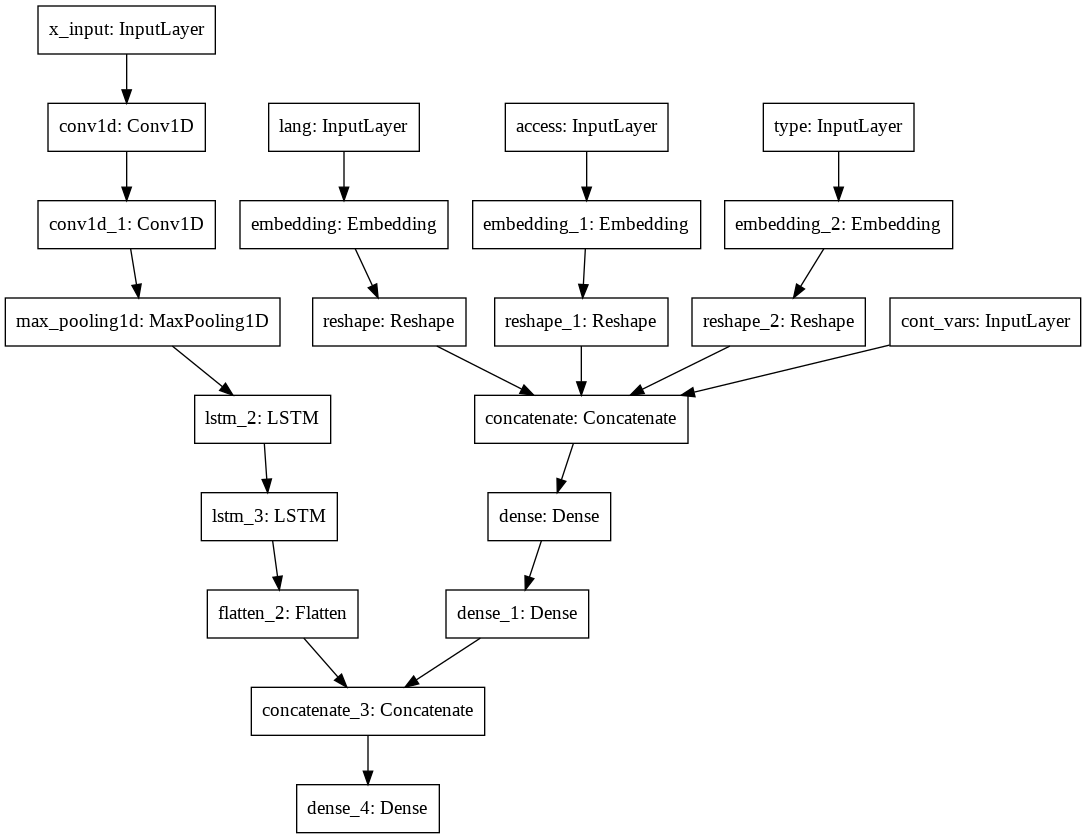

In [62]:
plot_model(model_cnnlstm)

In [ ]:
history_cnn_lstm = model_cnnlstm.fit({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":train_x,"cont_vars":input_num},y=train_y,
          validation_data=({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num},val_y),epochs=30,batch_size=1000)

Train on 145063 samples, validate on 145063 samples
Epoch 1/30
145063/145063 [==============================] - 21s 143us/sample - loss: 0.0279 - k_smape: 18.5608 - val_loss: 0.0337 - val_k_smape: 19.2688
Epoch 2/30
145063/145063 [==============================] - 21s 142us/sample - loss: 0.0272 - k_smape: 18.4708 - val_loss: 0.0338 - val_k_smape: 19.7665
Epoch 3/30
145063/145063 [==============================] - 21s 142us/sample - loss: 0.0266 - k_smape: 18.3613 - val_loss: 0.0328 - val_k_smape: 19.7850
Epoch 4/30
145063/145063 [==============================] - 21s 142us/sample - loss: 0.0263 - k_smape: 18.3204 - val_loss: 0.0336 - val_k_smape: 19.5790
Epoch 5/30
145063/145063 [==============================] - 21s 143us/sample - loss: 0.0260 - k_smape: 18.2608 - val_loss: 0.0321 - val_k_smape: 19.4727
Epoch 6/30
145063/145063 [==============================] - 20s 141us/sample - loss: 0.0261 - k_smape: 18.3049 - val_loss: 0.0325 - val_k_smape: 19.3653
Epoch 7/30
145063/145063 [====

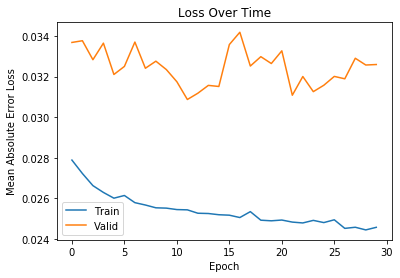

In [ ]:
plt.plot(history_cnn_lstm.history['loss'])
plt.plot(history_cnn_lstm.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])
plt.show()

In [ ]:
cnnlstm_val_pred = model_cnnlstm.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num})

In [ ]:
cnnlstm_sc = calc(unlog(val_y),unlog(cnnlstm_val_pred))

100%|██████████| 145063/145063 [00:28<00:00, 5165.23it/s]


In [ ]:
print("CNN LSTM validation SMAP : ",cnnlstm_sc)

CNN LSTM validation SMAP :  44.083669032425334


In [ ]:
print("CNN LSTM validation SMAP : ",cnnlstm_sc)

cnnlstm_test = model_cnnlstm.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":test_x,"cont_vars":input_num})
cnnlstm_sub =make_pred(test_x,unlog(cnnlstm_test))
cnnlstm_sub.to_csv("CNNLSTM_sub.csv",header=True,index=False)

### Biderectional LSTM 

In [63]:
layer_0 = Input(shape=(100,1), name='x_input')
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(layer_0)
max_layer = MaxPooling1D(pool_size=2, strides=None, padding='valid')(conv_layer)
bi_layer = Bidirectional(LSTM(128, return_sequences=True), merge_mode='concat')(max_layer)
layer_fl = Flatten()(bi_layer)
layer_conc = concatenate([layer_fl, y])
layer_d = Dense(64,activation="relu")(layer_conc)

model_cnn_bi = Model(inputs = [layer_0,ins],outputs=layer_d)
model_cnn_bi.compile(loss=Huber(),
              optimizer='adam',
              metrics=[k_smape])

In [64]:
model_cnn_bi.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lang (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
access (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
type (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
x_input (InputLayer)            [(None, 100, 1)]     0                                            
_______________________________________________________________________________________

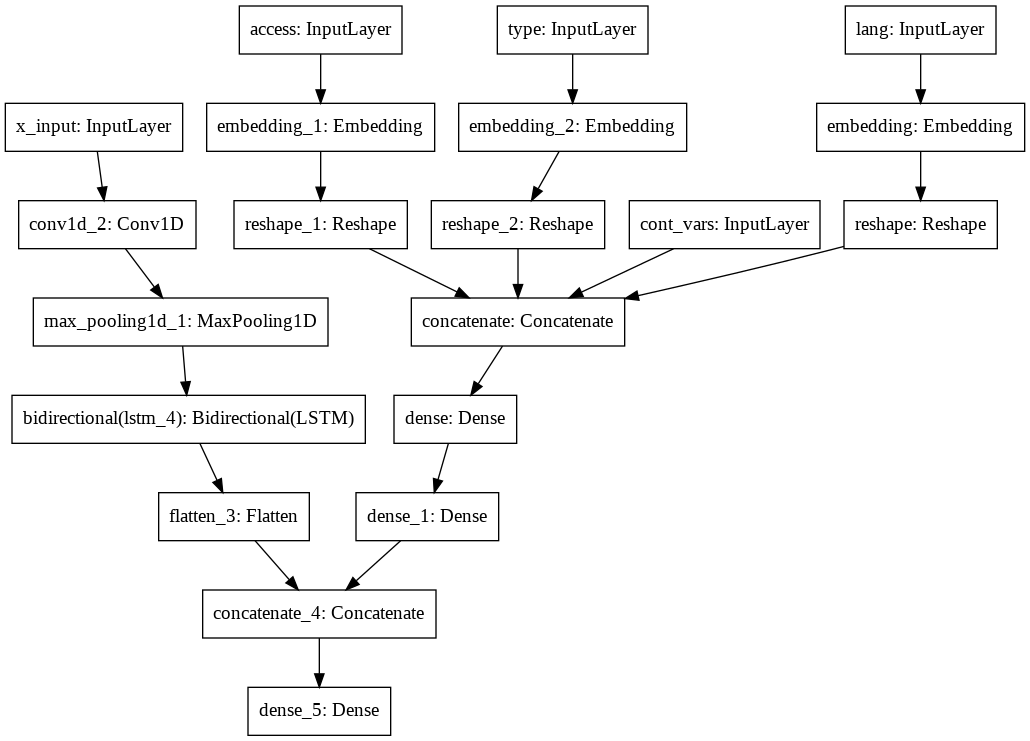

In [65]:
plot_model(model_cnn_bi)

In [ ]:
history_cnn_bi= model_cnn_bi.fit({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":train_x,"cont_vars":input_num},y=train_y,
          validation_data=({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num},val_y),epochs=30,batch_size=1000)

Train on 145063 samples, validate on 145063 samples
Epoch 1/30
145063/145063 [==============================] - 12s 83us/sample - loss: 0.0978 - k_smape: 24.3348 - val_loss: 0.0591 - val_k_smape: 20.8065
Epoch 2/30
145063/145063 [==============================] - 7s 50us/sample - loss: 0.0333 - k_smape: 17.2906 - val_loss: 0.0346 - val_k_smape: 18.5174
Epoch 3/30
145063/145063 [==============================] - 7s 50us/sample - loss: 0.0278 - k_smape: 16.5094 - val_loss: 0.0352 - val_k_smape: 18.6760
Epoch 4/30
145063/145063 [==============================] - 7s 50us/sample - loss: 0.0267 - k_smape: 16.2260 - val_loss: 0.0327 - val_k_smape: 17.8001
Epoch 5/30
145063/145063 [==============================] - 7s 50us/sample - loss: 0.0262 - k_smape: 16.0815 - val_loss: 0.0344 - val_k_smape: 18.1605
Epoch 6/30
145063/145063 [==============================] - 7s 50us/sample - loss: 0.0262 - k_smape: 15.8474 - val_loss: 0.0335 - val_k_smape: 17.1663
Epoch 7/30
145063/145063 [===============

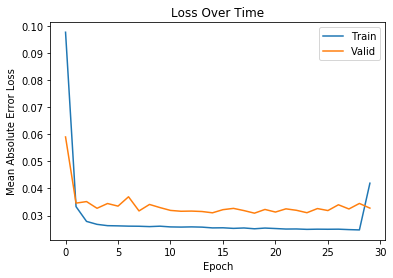

In [ ]:
plt.plot(history_cnn_bi.history['loss'])
plt.plot(history_cnn_bi.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])
plt.show()

In [ ]:
cnnbi_val_pred = model_cnn_bi.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num})

In [ ]:
cnnbi_sc = calc(unlog(val_y),unlog(cnnlstm_val_pred))

100%|██████████| 145063/145063 [00:31<00:00, 4620.33it/s]


In [ ]:
print("CNN Biderction validation SMAP : ",cnnbi_sc)


CNN Biderction validation SMAP :  44.083669032425334


In [ ]:
cnnbi_test =  model_cnn_bi.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":test_x,"cont_vars":input_num})
cnnbi_sub =make_pred(test_x,unlog(cnnlstm_test))
cnnbi_sub.to_csv("CNNBI_sub.csv",header=True,index=False)

## Dilated Convolution Network 

In [66]:
from  tensorflow.keras.layers import Input

In [67]:
layer_0 = Input(shape=(100,1), name='x_input')


In [68]:

cnn1 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=1,padding="causal",activation="relu")(layer_0)
cnn2 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=2,padding="causal",activation="relu")(cnn1)
cnn3 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=4,padding="causal",activation="relu")(cnn2)
cnn4 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=8,padding="causal",activation="relu")(cnn3)
cnn5 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=16,padding="causal",activation="relu")(cnn4)
cnn6 = Conv1D(filters=32,kernel_size=2,strides=1,dilation_rate=32,padding="causal",activation="relu")(cnn5)
layer_fl = Flatten()(cnn6)
layer_d = Dense(128,activation  = "relu")(layer_fl)
layer_con =  concatenate([layer_d,y])
layer_final = Dense(64,activation="relu")(layer_con)

model_cnn_dil = Model(inputs = [layer_0,ins],outputs=layer_final)

model_cnn_dil.compile(loss=Huber(),
              optimizer="adam",
              metrics=[k_smape])

#model_checkpoint = keras.callbacks.ModelCheckpoint( "my_checkpoint.h6", save_best_only=True)
#early_stopping = keras.callbacks.EarlyStopping(patience=50)


In [69]:
model_cnn_dil.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 100, 32)      96          x_input[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 100, 32)      2080        conv1d_3[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 100, 32)      2080        conv1d_4[0][0]                   
_______________________________________________________________________________________

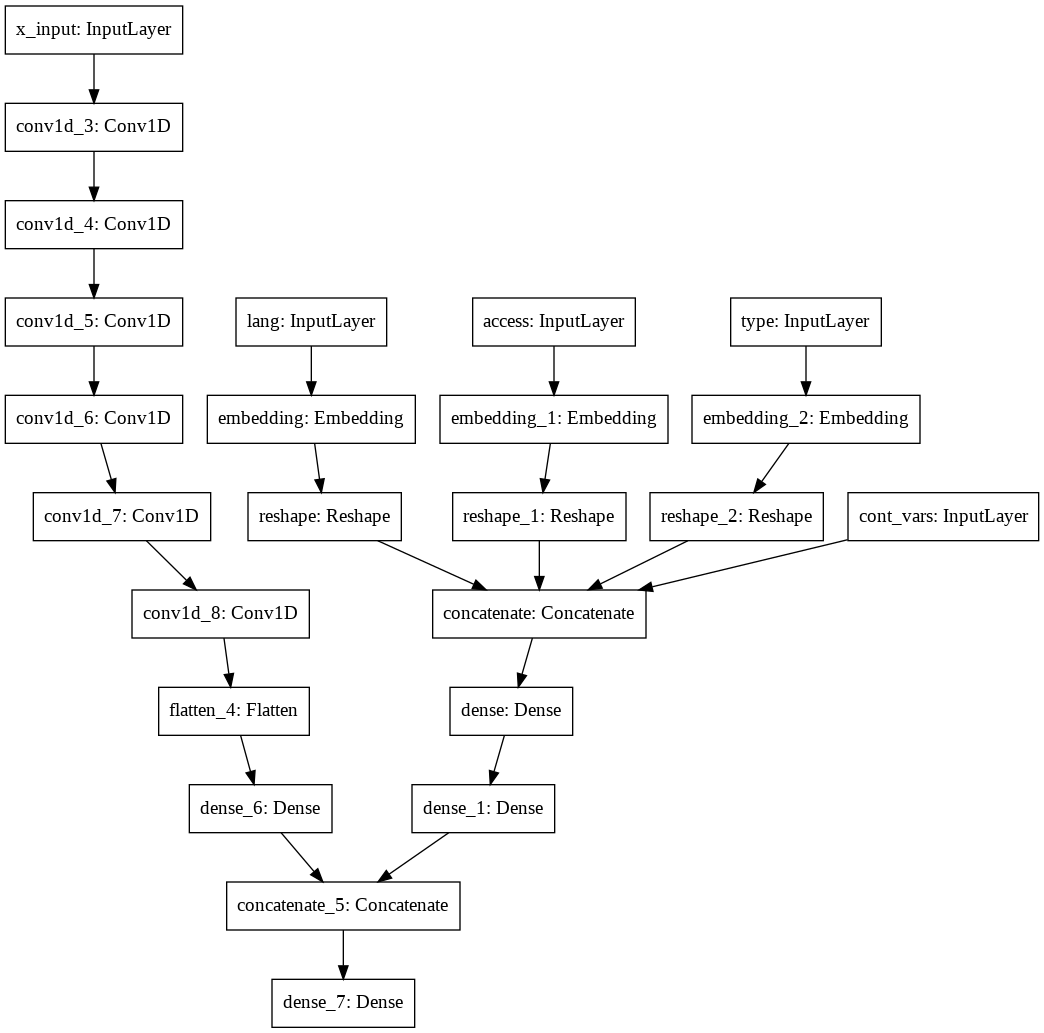

In [70]:
plot_model(model_cnn_dil)

In [ ]:
history_cnn_dil = model_cnn_dil.fit({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":train_x,"cont_vars":input_num},y=train_y,
          validation_data=({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num},val_y),epochs=30,batch_size=1000)

Train on 145063 samples, validate on 145063 samples
Epoch 1/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0274 - k_smape: 15.1302 - val_loss: 0.0357 - val_k_smape: 17.3186
Epoch 2/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0265 - k_smape: 15.0143 - val_loss: 0.0333 - val_k_smape: 16.7424
Epoch 3/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0260 - k_smape: 14.9646 - val_loss: 0.0329 - val_k_smape: 16.7113
Epoch 4/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0258 - k_smape: 15.0848 - val_loss: 0.0310 - val_k_smape: 16.2398
Epoch 5/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0256 - k_smape: 15.0628 - val_loss: 0.0313 - val_k_smape: 16.0951
Epoch 6/30
145063/145063 [==============================] - 6s 41us/sample - loss: 0.0254 - k_smape: 14.9760 - val_loss: 0.0314 - val_k_smape: 16.4848
Epoch 7/30
145063/145063 [================

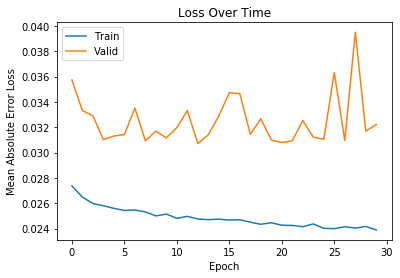

In [ ]:
plt.plot(history_cnn_dil.history['loss'])
plt.plot(history_cnn_dil.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])
plt.show()

In [ ]:
cnndil_val_pred = model_cnn_dil.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":val_x,"cont_vars":input_num})

In [ ]:
cnndil_sc = calc(unlog(val_y),unlog(cnndil_val_pred))

100%|██████████| 145063/145063 [00:26<00:00, 5527.87it/s]


In [ ]:
print("CNN Dilation validation SMAP : ",cnndil_sc)


CNN Dilation validation SMAP :  42.749372629126164


In [ ]:
cnndil_test =  model_cnn_dil.predict({"lang":lang_fe,"access":acc_fe,"type":ty_fe,"x_input":test_x,"cont_vars":input_num})
cnndil_sub =make_pred(test_x,unlog(cnndil_test))
cnndil_sub.to_csv("CNNDIL_sub.csv",header=True,index=False)

## Final Table 

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Models", "Validation SMAPE", "Kaggle SMAPE"]

In [ ]:
x.add_row(["CNN 1D", 50.52750902606337, 43.94233])
x.add_row(["LSTM", 45.24965046075464, 43.23433])
x.add_row(["CNN+LSTM",44.083669032425334, 42.05886])
x.add_row(["CNN-Bidirectional"  ,44.083669032425334,43.94233])
x.add_row(["CNN with Dilationan",  42.749372629126164,41.41118])

In [ ]:
print(x)

+---------------------+--------------------+--------------+
|        Models       |  Validation SMAPE  | Kaggle SMAPE |
+---------------------+--------------------+--------------+
|        CNN 1D       | 50.52750902606337  |   43.94233   |
|         LSTM        | 45.24965046075464  |   43.23433   |
|       CNN+LSTM      | 44.083669032425334 |   42.05886   |
|  CNN-Bidirectional  | 44.083669032425334 |   43.94233   |
| CNN with Dilationan | 42.749372629126164 |   41.41118   |
+---------------------+--------------------+--------------+
